In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import output_processing as op

/Users/ab-purushothama-macbook/.conda/envs/prej-prompt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_list = [
    # Main set of models with instruct divide and size variety
    "meta-llama/Llama-3.2-1B",
    "meta-llama/Llama-3.2-1B-Instruct",
    "meta-llama/Llama-3.2-3B",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.1-8B",
    "meta-llama/Llama-3.1-8B-Instruct",
    # Small reference model - would allow for pretraining variation
    "gpt2-medium",
    # Other open models
    "allenai/OLMo-2-1124-7B",
    "allenai/OLMo-2-1124-7B-Instruct",
    "mistralai/Ministral-8B-Instruct-2410",
    "google/gemma-7b",
    "google/gemma-7b-it"
]

def read_and_organize_model_results(model_name):
    model_results = pd.read_csv(f"runs/runs-42_07_18/{model_name}-results.csv")
    model_results.replace([0.0], -65504, inplace=True)
    model_results = op.organize_distribution(model_results)
    model_results["model_name"] = model_name.split("/")[-1]
    model_results.loc[model_results["Covered"] == True, "Judgment"] = "Covered"
    model_results.loc[model_results["Covered"] == True, "Judgment_prob"] = model_results["Covered_prob"]
    model_results.loc[model_results["NotCovered"] == True, "Judgment"] = "NotCovered"
    model_results.loc[model_results["NotCovered"] == True, "Judgment_prob"] = model_results["NotCovered_prob"]
    print(model_name, model_results.output.value_counts())
    return model_results
    
combined_results = [read_and_organize_model_results(model_name) for model_name in model_list]
combined_df = pd.concat(combined_results).reset_index()
combined_df.loc[:, "item"] = combined_df["title"] + combined_df["version"]
combined_df.shape

meta-llama/Llama-3.2-1B output
yes       565
"         255
B         164
A         112
Yes        85
it         48
Harper      7
No          6
Name: count, dtype: int64
meta-llama/Llama-3.2-1B-Instruct output
yes    768
B      267
No     161
        17
\n      11
Yes      9
A        9
Name: count, dtype: int64
meta-llama/Llama-3.2-3B output
yes    846
B      260
no     112
A       14
No       7
C        2
\n       1
Name: count, dtype: int64
meta-llama/Llama-3.2-3B-Instruct output
yes    820
B      259
No      92
no      48
A       17
\n       6
Name: count, dtype: int64
meta-llama/Llama-3.1-8B output
yes    789
B      184
no     177
A       92
Name: count, dtype: int64
meta-llama/Llama-3.1-8B-Instruct output
no     617
yes    272
B      226
No      67
A       50
Yes     10
Name: count, dtype: int64
gpt2-medium output
yes      580
no       253
A        201
"        133
B         71
Genie      3
No         1
Name: count, dtype: int64
allenai/OLMo-2-1124-7B output
yes        556
no      

(14904, 28)

In [3]:
combined_df.sample()

,index,title,prompt_type,prompt,version,output,output_text,cum_logprob,YES_probs,Yes_probs,...,UnAff_prob,Covered_prob,NotCovered_prob,Covered,NotCovered,entropy,model_name,Judgment,Judgment_prob,item
1294,52,Identity Theft I,yes_or_no,Jason has insurance coverage against loss and ...,unambiguous_covered,yes,yes.,NaN,-3.031528,0.268154,...,0.1616,0.268154,0.1616,True,False,0.967779,Llama-3.2-1B-Instruct,Covered,0.268154,Identity Theft Iunambiguous_covered


In [4]:
combined_df

,index,title,prompt_type,prompt,version,output,output_text,cum_logprob,YES_probs,Yes_probs,...,UnAff_prob,Covered_prob,NotCovered_prob,Covered,NotCovered,entropy,model_name,Judgment,Judgment_prob,item
0,0,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",unambiguous_uncovered,it,it depends.\nThe insurance company's definiti...,NaN,-5.554084,0.095245,...,0.068116,0.095245,0.068116,True,False,0.556171,Llama-3.2-1B,Covered,0.095245,Emergency Damages Iunambiguous_uncovered
1,1,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",unambiguous_covered,it,it depends.\nThe insurance company argues tha...,NaN,-5.560510,0.096750,...,0.067207,0.096750,0.067207,True,False,0.557145,Llama-3.2-1B,Covered,0.096750,Emergency Damages Iunambiguous_covered
2,2,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",controversial,it,it depends.\nThe insurance company's definiti...,NaN,-5.304534,0.112464,...,0.070489,0.112464,0.070489,True,False,0.597797,Llama-3.2-1B,Covered,0.112464,Emergency Damages Icontroversial
3,3,Emergency Damages II,yes_or_no,"Salma's home insurance covers ""Emergency Damag...",unambiguous_uncovered,it,it depends.\nThe first thing to note is that ...,NaN,-4.786050,0.141056,...,0.083616,0.141056,0.083616,True,False,0.681065,Llama-3.2-1B,Covered,0.141056,Emergency Damages IIunambiguous_uncovered
4,4,Emergency Damages II,yes_or_no,"Salma's home insurance covers ""Emergency Damag...",unambiguous_covered,it,it depends.\nThe first thing to note is that ...,NaN,-4.936429,0.120958,...,0.086790,0.120958,0.086790,True,False,0.652136,Llama-3.2-1B,Covered,0.120958,Emergency Damages IIunambiguous_covered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14899,1237,Vehicle Glass I,options_flipped,Ahmad's car insurance policy includes coverage...,unambiguous_covered,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe t...,NaN,-12.750042,0.000159,...,0.049785,0.367862,0.049785,True,False,0.713895,gemma-7b-it,Covered,0.367862,Vehicle Glass Iunambiguous_covered
14900,1238,Vehicle Glass I,options_flipped,Ahmad's car insurance policy includes coverage...,controversial,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe t...,NaN,-12.541211,0.000153,...,0.037209,0.101144,0.037209,True,False,0.440780,gemma-7b-it,Covered,0.101144,Vehicle Glass Icontroversial
14901,1239,Vehicle Glass II,options_flipped,Aneesh's car insurance policy includes coverag...,unambiguous_uncovered,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe p...,NaN,-12.605734,0.000236,...,0.034860,0.257580,0.034860,True,False,0.617459,gemma-7b-it,Covered,0.257580,Vehicle Glass IIunambiguous_uncovered
14902,1240,Vehicle Glass II,options_flipped,Aneesh's car insurance policy includes coverag...,unambiguous_covered,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe p...,NaN,-12.389812,0.000179,...,0.043501,0.412730,0.043501,True,False,0.720363,gemma-7b-it,Covered,0.412730,Vehicle Glass IIunambiguous_covered


In [17]:
prompt_type_mask = combined_df["prompt_type"] == "yes_or_no"
yes_or_no_df = combined_df[prompt_type_mask]

yes_or_no_group_df = yes_or_no_df.groupby(["model_name"], as_index=False, sort=False).aggregate( {'Covered_prob':['mean','std', 'min', 'max'], 'NotCovered_prob':['mean','std', 'min', 'max'], 'Other_prob' :['mean','std', 'min', 'max']})
yes_or_no_group_df

model_name Covered_prob                                \
                                       mean       std       min       max   
0                 Llama-3.2-1B     0.176294  0.042294  0.080695  0.274445   
1        Llama-3.2-1B-Instruct     0.386197  0.064331  0.254252  0.502674   
2                 Llama-3.2-3B     0.346328  0.058624  0.200222  0.498747   
3        Llama-3.2-3B-Instruct     0.323628  0.073755  0.145418  0.505984   
4                 Llama-3.1-8B     0.228983  0.028893  0.174285  0.303767   
5        Llama-3.1-8B-Instruct     0.229607  0.064507  0.093414  0.389125   
6                  gpt2-medium     0.171223  0.022611  0.123690  0.234595   
7               OLMo-2-1124-7B     0.310189  0.072417  0.177381  0.564022   
8      OLMo-2-1124-7B-Instruct     0.379888  0.330080  0.000659  0.988309   
9   Ministral-8B-Instruct-2410     0.361719  0.081906  0.205760  0.578505   
10                    gemma-7b     0.259955  0.040890  0.173344  0.429918   
11                 gemma-7b-it     0.899433  0.213336  0.005786  0.993785   

   NotCovered_prob                               Other_prob            \
              mean       std       min       max       mean       std   
0         0.092460  0.016418  0.059240  0.135231   0.731246  0.053948   
1         0.191766  0.031198  0.132383  0.256937   0.422037  0.077799   
2         0.167196  0.052347  0.084587  0.362021   0.486476  0.057844   
3         0.378568  0.086942  0.193017  0.651090   0.297804  0.056185   
4         0.224190  0.047959  0.124795  0.343739   0.546828  0.058650   
5         0.546941  0.058694  0.365933  0.703694   0.223452  0.050488   
6         0.238235  0.021354  0.197732  0.298753   0.590542  0.028917   
7         0.301464  0.053019  0.193524  0.500451   0.388347  0.091998   
8         0.554578  0.331633  0.006049  0.990202   0.065534  0.079850   
9         0.330138  0.072734  0.196427  0.518999   0.308143  0.031148   
10        0.280426  0.043974  0.171359  0.414472   0.459618  0.056155   
11        0.072692  0.211466  0.000031  0.986001   0.027874  0.029250   

                        
         min       max  
0   0.619157  0.860065  
1   0.272888  0.596437  
2   0.368926  0.627112  
3   0.186999  0.462084  
4   0.380695  0.672773  
5   0.130789  0.407548  
6   0.507808  0.649536  
7   0.076513  0.597716  
8   0.005305  0.604943  
9   0.205753  0.391251  
10  0.325837  0.608164  
11  0.005404  0.276618

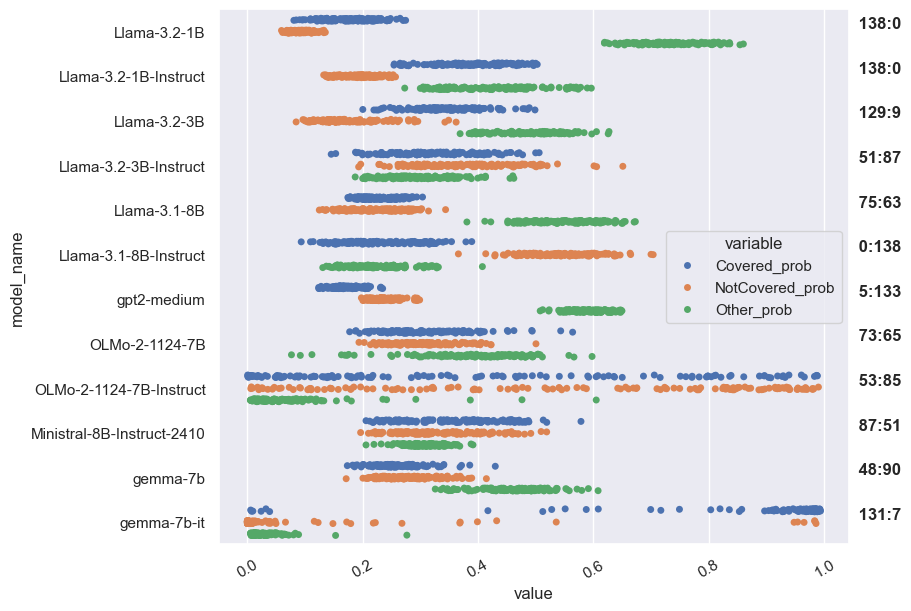

In [15]:
# Melt yes_or_no for the three supported variables
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")

count_labels = yes_or_no_df.groupby('model_name', as_index=False, sort=False).aggregate(
    {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)
count_labels


p = sns.stripplot(x='value', y='model_name',  hue='variable', jitter=True, dodge=True, data=yes_or_no_df.melt(id_vars = ["model_name"], value_vars=["Covered_prob", "NotCovered_prob", "Other_prob"]))
for i, counts in enumerate(zip(count_labels.Covered.values, count_labels.NotCovered.values)): 
    covered = counts[0]
    not_covered = counts[1]
    ax.text(ax.get_xlim()[1] + 0.05, i, f' {covered}:{not_covered}', 
        ha='center', va='bottom', fontweight='bold')

fig.savefig("reports/chart-1-prob-ranges.pdf")

# Try boxplot for ranges discussion

In [18]:
prompt_type_mask = combined_df["prompt_type"] == "yes_or_no"
data_df = combined_df[prompt_type_mask]

covered_mask = data_df["Judgment"] == "Covered"
not_covered_mask = data_df["Judgment"] == "NotCovered"
count_labels = data_df.groupby('model_name', as_index=False, sort=False).aggregate(
    {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)
count_labels

,model_name,Covered,NotCovered
0,Llama-3.2-1B,138,0
1,Llama-3.2-1B-Instruct,138,0
2,Llama-3.2-3B,129,9
3,Llama-3.2-3B-Instruct,51,87
4,Llama-3.1-8B,75,63
5,Llama-3.1-8B-Instruct,0,138
6,gpt2-medium,5,133
7,OLMo-2-1124-7B,73,65
8,OLMo-2-1124-7B-Instruct,53,85
9,Ministral-8B-Instruct-2410,87,51
